In [1]:
import pandas as pd
import numpy as np
import sklearn
import chardet
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

import matplotlib
from sklearn.decomposition import PCA

In [2]:
train_raw = pd.read_csv(r'F:\CMI\Other_people\Aritra\All\Aml\data\fashionmnist\fashion-mnist_train.csv')
test_raw = pd.read_csv(r'F:\CMI\Other_people\Aritra\All\Aml\data\fashionmnist\fashion-mnist_test.csv')

In [3]:
train = train_raw.drop(['label'],axis=1)
test = test_raw.drop(['label'],axis=1)
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
kmeans = KMeans(n_clusters=100, random_state=69)
pipeline = Pipeline([('classifier', kmeans)])
model = pipeline.fit(train)

centers = model.named_steps['classifier'].cluster_centers_

In [5]:
predict = pipeline.predict(test)
print(predict.shape)

(10000,)


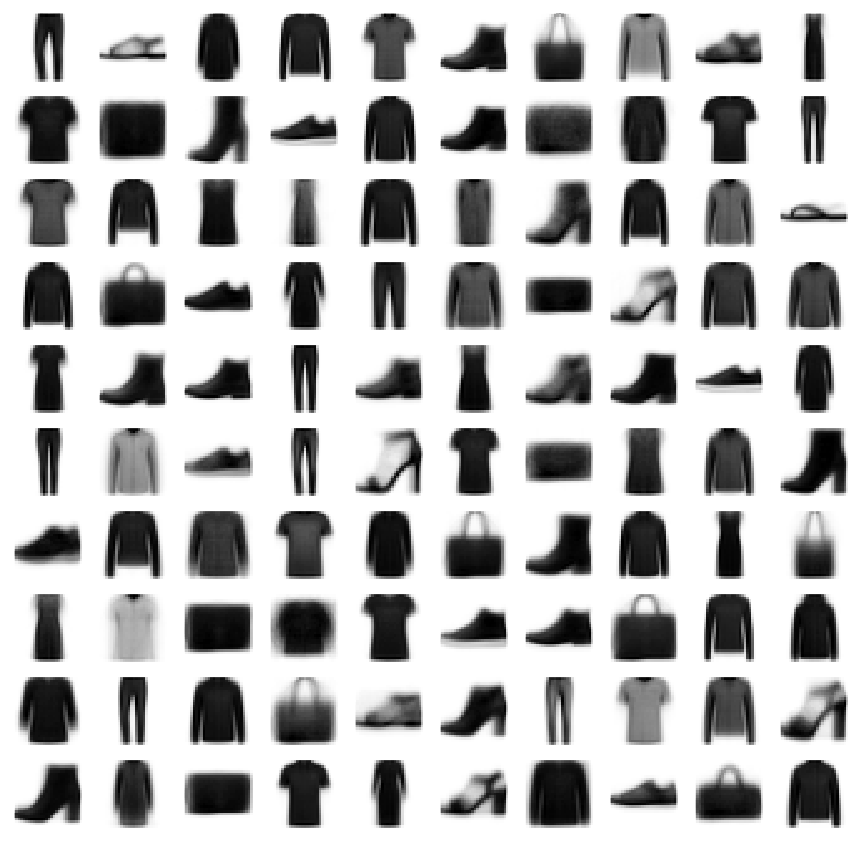

In [6]:
fig, ax = plt.subplots(10 , 10 , figsize = (15 , 15))
centers_shape = centers.reshape(100 , 28, 28)
for axi, center in zip(ax.flat, centers_shape):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [7]:
labels = np.zeros_like(predict)
for i in range(100):
    mask = (predict == i)
    labels[mask] = mode(test_raw["label"][mask])[0]

In [8]:
accuracy_score(test_raw["label"], labels)

0.7484

In [9]:
set(test_raw["label"])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# TSNE

In [10]:
tsne = TSNE(n_components=2, init='random', random_state=69)
train_tsne = tsne.fit_transform(train)
test_tsne = tsne.fit_transform(test)

In [11]:
kmeans_with_tsne = KMeans(n_clusters=100, random_state=69)
pipeline_tsne = Pipeline([('classifier', kmeans_with_tsne)])
model = pipeline_tsne.fit(train_tsne)

centers_tsne = model.named_steps['classifier'].cluster_centers_

In [ ]:
predict_tsne = pipeline_tsne.predict(test_tsne)
#print(predict_tsne.shape)

In [18]:
labels_tsne = np.zeros_like(predict_tsne)
for i in range(100):
    mask = (predict_tsne == i)
    labels_tsne[mask] = mode(test_raw["label"][mask])[0]

In [19]:
accuracy_score(test_raw["label"], labels_tsne)

0.7484

# Plot

In [20]:
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

ready


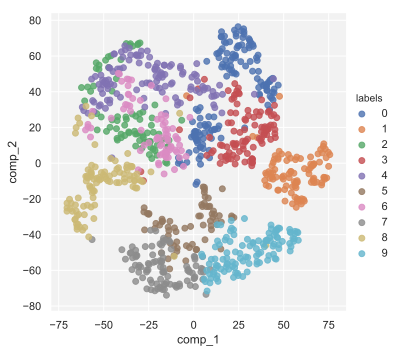

In [21]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
tsne = pd.DataFrame(test_tsne)
tsne.columns = ["comp_1", "comp_2"]
tsne["labels"] = labels_tsne
sns.lmplot("comp_1", "comp_2", hue = "labels", data = tsne.sample(1000) ,fit_reg=False)
print("ready")